# 第一部 構造化データ

## 第一章 システムデータの加工・可視化

### 1. 法人情報データの読み込み

In [91]:
import pandas as pd

In [92]:
# データの読み込み時はencodingに気を付ける
data = pd.read_csv("../data/22_shizuoka_all_20210331.csv", encoding="shift-jis", header=None)

### 2. 読み込んだデータの確認

In [93]:
# 項目名の確認
data.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
           dtype='int64')

In [94]:
# 項目数の確認
len(data.columns)

30

In [95]:
# データの型の確認
data.dtypes

0       int64
1       int64
2       int64
3       int64
4      object
5      object
6      object
7     float64
8       int64
9      object
10     object
11     object
12    float64
13      int64
14      int64
15    float64
16    float64
17    float64
18     object
19    float64
20    float64
21     object
22     object
23      int64
24     object
25     object
26     object
27    float64
28     object
29      int64
dtype: object

In [96]:
# データの型を指定してデータの取り込み
data = pd.read_csv("../data/22_shizuoka_all_20210331.csv", encoding="shift-jis", header=None, dtype=object)

In [97]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0


In [98]:
data.dtypes

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
24    object
25    object
26    object
27    object
28    object
29    object
dtype: object

### 3. ヘッダ用のテキストファイルの読み込み

In [99]:
# バックスラッシュはopt+¥
mst = pd.read_csv("../data/mst_column_name.txt", encoding="shift-jis", sep="\t", engine="python")

In [100]:
mst.head()

,column_id,column_name_ja,column_name_en
0,1,一連番号,sequenceNumber
1,2,法人番号,corporateNumber
2,3,処理区分,process
3,4,訂正区分,correct
4,5,更新年月日,updateDate


In [101]:
len(mst)

30

### 4. ヘッダ行の追加

In [102]:
columns = mst['column_name_en'].values

In [103]:
data.columns = columns

In [104]:
data.head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0


### 5. 統計量や欠損値の確認

In [105]:
data.describe()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
count,114613,114613,114613,114613,114613,114613,114613,1243,114613,114613,...,666,1111,114613,114613,232,230,230,0,46620,114613
unique,114613,114613,6,2,1316,1344,105857,1243,9,1,...,572,1051,1328,1,231,1,129,0,41339,2
top,112218,4080005006766,01,0,2015-11-13,2015-10-05,八幡神社,00068312,301,静岡県,...,8080001004480,平成２９年１２月１日静岡市駿河区富士見台一丁目２１番２２号富士見工業株式会社（8080001...,2015-10-05,1,Kamiide financial ward,Shizuoka,"212-2,Tanaka, Kawazu cho",NaN,ハチマングウ,0
freq,1,1,94126,80704,55969,83291,171,1,51229,114613,...,12,12,101316,114613,2,230,10,NaN,30,114388


In [106]:
# Trueが欠損値
data.isna()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114608,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False
114609,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False
114610,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False
114611,False,False,False,False,False,False,False,True,False,False,...,True,True,False,False,True,True,True,True,False,False


In [107]:
data.isna().sum()

sequenceNumber                   0
corporateNumber                  0
process                          0
correct                          0
updateDate                       0
changeDate                       0
name                             0
nameImageId                 113370
kind                             0
prefectureName                   0
cityName                         0
streetNumber                    17
addressImageId              113418
prefectureCode                   0
cityCode                         0
postCode                       173
addressOutside              114613
addressOutsideImageId       114613
closeDate                   104536
closeCause                  104536
successorCorporateNumber    113947
changeCause                 113502
assignmentDate                   0
latest                           0
enName                      114381
enPrefectureName            114383
enCityName                  114383
enAddressOutside            114613
furigana            

### 6. 繰り返し処理で新しいデータを追加

In [108]:
import os

In [109]:
os.listdir("../data")

['22_shizuoka_all_20210331.csv',
 'diff_20210401.csv',
 'diff_20210405.csv',
 'diff_20210406.csv',
 'diff_20210407.csv',
 'diff_20210408.csv',
 'diff_20210409.csv',
 'mst_closeCause.csv',
 'mst_column_name.txt',
 'mst_corp_kind.csv',
 'mst_correct_kbn.csv',
 'mst_hihyoji.csv',
 'mst_latest.csv',
 'mst_process_kbn.csv']

In [110]:
from glob import glob

In [111]:
diff_files = glob("../data/diff*.csv")

In [112]:
diff_files

['../data/diff_20210401.csv',
 '../data/diff_20210405.csv',
 '../data/diff_20210406.csv',
 '../data/diff_20210407.csv',
 '../data/diff_20210408.csv',
 '../data/diff_20210409.csv']

In [113]:
diff_files.sort()
diff = pd.read_csv(diff_files[0], encoding="shift-jis", header=None, dtype=object)
print(len(diff))
diff.head(3)

2316


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1010001016019,71,0,2021-04-01,2021-03-01,株式会社国際漢方研究所,NaN,301,東京都,...,NaN,令和３年３月１日東京都渋谷区千駄ヶ谷五丁目２９番１１号ナカニシビル６０２号室株式会社Ｉｎｔｅ...,2015-10-05,1,NaN,NaN,NaN,NaN,コクサイカンポウケンキュウショ,0
1,2,1010001092869,01,1,2021-04-01,2020-06-11,あさひ銀リテールファイナンス株式会社,NaN,301,東京都,...,NaN,NaN,2020-06-11,0,NaN,NaN,NaN,NaN,アサヒギンリテールファイナンス,0
2,3,1010001092869,21,0,2021-04-01,2021-03-22,あさひ銀リテールファイナンス株式会社,NaN,301,東京都,...,NaN,NaN,2020-06-11,1,NaN,NaN,NaN,NaN,アサヒギンリテールファイナンス,0


In [114]:
diff.columns = columns
diff = diff.loc[diff['prefectureName'] == '静岡県']
print(len(diff))
diff.head(3)

43


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
107,108,1080001015906,01,1,2021-04-01,2015-10-05,株式会社エムケイテック,NaN,301,静岡県,...,NaN,NaN,2015-10-05,0,NaN,NaN,NaN,NaN,エムケイテック,0
108,109,1080001015906,12,1,2021-04-01,2021-03-30,株式会社エムケイテック,NaN,301,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,エムケイテック,0
109,110,1080002015434,01,1,2021-04-01,2015-10-05,有限会社ハイナンＤＣ,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,ハイナンディーシー,0


In [115]:
diff_files

['../data/diff_20210401.csv',
 '../data/diff_20210405.csv',
 '../data/diff_20210406.csv',
 '../data/diff_20210407.csv',
 '../data/diff_20210408.csv',
 '../data/diff_20210409.csv']

In [116]:
for f in diff_files:
    diff = pd.read_csv(f, encoding='shift-jis', header=None, dtype=object)
    diff.columns = columns
    diff = diff.loc[diff['prefectureName'] == '静岡県']
    data = data.append(diff)

In [117]:
data

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3194,3195,9080001021673,01,1,2021-04-09,2017-07-07,株式会社ＡＣＴ,NaN,301,静岡県,...,NaN,NaN,2017-07-07,1,NaN,NaN,NaN,NaN,アクト,0
3195,3196,9080101022431,01,0,2021-04-09,2021-04-09,株式会社ＬＥＳＱＵＡ,NaN,301,静岡県,...,NaN,NaN,2021-04-09,1,NaN,NaN,NaN,NaN,レスカ,0
3196,3197,9080102008933,01,1,2021-04-09,2015-10-05,有限会社サクラ急送,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,サクラキュウソウ,0
3197,3198,9080402002859,21,0,2021-04-09,2021-04-01,有限会社弘法,NaN,302,静岡県,...,8080401016019,令和３年４月１日静岡県磐田市安久路二丁目２番地の２まごころ株式会社（808040101601...,2015-10-05,1,NaN,NaN,NaN,NaN,コウボウ,0


In [118]:
data.describe()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
count,115020,115020,115020,115020,115020,115020,115020,1246,115020,115020,...,678,1130,115020,115020,233,231,231,0,47018,115020
unique,114613,114758,6,2,1322,1351,106019,1245,9,1,...,581,1067,1334,2,232,1,130,0,41577,2
top,3032,7080402010509,01,0,2015-11-13,2015-10-05,八幡神社,00067824,301,静岡県,...,8080001004480,平成２９年１２月１日静岡市駿河区富士見台一丁目２１番２２号富士見工業株式会社（8080001...,2015-10-05,1,Kamiide financial ward,Shizuoka,"212-2,Tanaka, Kawazu cho",NaN,ハチマングウ,0
freq,4,5,94398,80949,55969,83411,171,2,51474,115020,...,12,12,101546,114985,2,231,10,NaN,30,114795


In [119]:
print(data[data["corporateNumber"].duplicated()])

     sequenceNumber corporateNumber process correct  updateDate  changeDate  \
107             108   1080001015906      01       1  2021-04-01  2015-10-05   
108             109   1080001015906      12       1  2021-04-01  2021-03-30   
109             110   1080002015434      01       1  2021-04-01  2015-10-05   
110             111   1080105005588      12       0  2021-04-01  2021-03-25   
113             114   1080403003401      21       0  2021-04-01  2021-03-02   
...             ...             ...     ...     ...         ...         ...   
3193           3194   9080001004208      01       1  2021-04-09  2015-10-05   
3194           3195   9080001021673      01       1  2021-04-09  2017-07-07   
3196           3197   9080102008933      01       1  2021-04-09  2015-10-05   
3197           3198   9080402002859      21       0  2021-04-09  2021-04-01   
3198           3199   9080402015836      12       0  2021-04-09  2021-04-01   

                        name nameImageId kind prefe

In [120]:
data.drop_duplicates(subset='corporateNumber', keep='last', inplace=True)

In [121]:
data.describe()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
count,114758,114758,114758,114758,114758,114758,114758,1245,114758,114758,...,678,1129,114758,114758,233,231,231,0,46900,114758
unique,114388,114758,6,2,1322,1351,105992,1245,9,1,...,581,1066,1334,2,232,1,130,0,41559,2
top,3032,4080005006766,01,0,2015-11-13,2015-10-05,八幡神社,00068312,301,静岡県,...,8080001004480,平成２９年１２月１日静岡市駿河区富士見台一丁目２１番２２号富士見工業株式会社（8080001...,2015-10-05,1,Kamiide financial ward,Shizuoka,"212-2,Tanaka, Kawazu cho",NaN,ハチマングウ,0
freq,4,1,94176,80781,55849,83217,171,1,51331,114758,...,12,12,101319,114757,2,231,10,NaN,30,114533


In [122]:
data.isna().sum()

sequenceNumber                   0
corporateNumber                  0
process                          0
correct                          0
updateDate                       0
changeDate                       0
name                             0
nameImageId                 113513
kind                             0
prefectureName                   0
cityName                         0
streetNumber                    17
addressImageId              113563
prefectureCode                   0
cityCode                         0
postCode                       173
addressOutside              114758
addressOutsideImageId       114758
closeDate                   104650
closeCause                  104650
successorCorporateNumber    114080
changeCause                 113629
assignmentDate                   0
latest                           0
enName                      114525
enPrefectureName            114527
enCityName                  114527
enAddressOutside            114758
furigana            

### 7. マスタを読み込んで項目を横に繋げる

In [123]:
os.listdir('../data')

['22_shizuoka_all_20210331.csv',
 'diff_20210401.csv',
 'diff_20210405.csv',
 'diff_20210406.csv',
 'diff_20210407.csv',
 'diff_20210408.csv',
 'diff_20210409.csv',
 'mst_closeCause.csv',
 'mst_column_name.txt',
 'mst_corp_kind.csv',
 'mst_correct_kbn.csv',
 'mst_hihyoji.csv',
 'mst_latest.csv',
 'mst_process_kbn.csv']

In [124]:
mst_process_kbn = pd.read_csv('../data/mst_process_kbn.csv', dtype=object)
mst_process_kbn

,process,process_kbn_name
0,01,新規
1,11,商号又は名称の変更
2,12,国内所在地の変更
3,13,国外所在地の変更
4,21,登記記録の閉鎖等
5,22,登記記録の復活等
6,71,吸収合併
7,72,吸収合併無効
8,81,商号の登記の抹消
9,99,削除


In [125]:
data = data.merge(mst_process_kbn, on='process', how='left')

In [126]:
data.head(3)

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規


In [127]:
mst_correct_kbn = pd.read_csv('../data/mst_correct_kbn.csv', encoding='shift-jis', dtype=object)
mst_correct_kbn

,correct,correct_kbn_name
0,0,訂正以外
1,1,訂正


In [128]:
data = data.merge(mst_correct_kbn, on='correct', how='left')
print(len(data.columns))
data.head(3)

32


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正


In [129]:
mst_corp_kind = pd.read_csv('../data/mst_corp_kind.csv', dtype=object)
mst_corp_kind

,kind,corp_kind_name
0,101,国の機関
1,201,地方公共団体
2,301,株式会社
3,302,有限会社
4,303,合名会社
5,304,合資会社
6,305,合同会社
7,399,その他の設立登記法人
8,401,外国会社等
9,499,その他


In [130]:
data = data.merge(mst_corp_kind, on='kind', how='left')
print(len(data.columns))
data.head(3)

33


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関


In [131]:
mst_close_cause = pd.read_csv('../data/mst_closeCause.csv', dtype=object)
mst_close_cause

,closeCause,closeCause_name
0,01,清算の結了等
1,11,合併による解散等
2,21,登記官による閉鎖
3,31,その他の清算の結了等


In [132]:
data = data.merge(mst_close_cause, on='closeCause', how='left')
print(len(data.columns))
data.head(3)

34


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN


In [133]:
mst_latest = pd.read_csv('../data/mst_latest.csv', dtype=object)
mst_latest

,latest,latest_name
0,0,過去情報
1,1,最新情報


In [134]:
data = data.merge(mst_latest, on='latest', how='left')
print(len(data.columns))
data.head(3)

35


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報


In [135]:
mst_hihyoji = pd.read_csv('../data/mst_hihyoji.csv', dtype=object)
mst_hihyoji

,hihyoji,hihyoji_name
0,0,検索対象
1,1,検索対象除外


In [136]:
data = data.merge(mst_hihyoji, on='hihyoji', how='left')
print(len(data.columns))
data.head(3)

36


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,"1-20, Jonaicho, Aoi ku, Shizuoka shi",NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象


### 8. テキストの連結や分割

In [137]:
# 都道府県、市区町村、丁目番地に欠損値がないかを確認
data[['prefectureName', 'cityName', 'streetNumber']].isna().sum()

prefectureName     0
cityName           0
streetNumber      17
dtype: int64

In [138]:
# 欠損値を含んだ状態で連結すると、結果もNaNとなってしまう
data['address'] = data['prefectureName'] + data['cityName'] + data['streetNumber']
print(len(data.columns))
data.head(3)

37


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,NaN,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５


In [139]:
data.loc[data['streetNumber'].isna()].head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address
3898,3909,1080005006629,01,0,2015-11-13,2015-10-05,保証責任尾羽愛郷負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN
16621,16657,2080005006628,01,0,2015-11-13,2015-10-05,保証責任原下河原負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN
20848,20889,2080105004250,01,1,2019-07-05,2015-10-05,保證責任對島村負債整理組合,NaN,399,静岡県,...,NaN,ホショウセキニンタジマムラフサイセイリクミアイ,1,新規,訂正,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN
42002,42086,4080005006626,01,0,2015-11-13,2015-10-05,保証責任小屋敷負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN
42003,42087,4080005006634,01,0,2015-11-13,2015-10-05,保証責任吉原革新負債整理組合,NaN,399,静岡県,...,NaN,NaN,1,新規,訂正以外,その他の設立登記法人,NaN,最新情報,検索対象除外,NaN


In [140]:
# streetNumberがNaNとなっているものの処理
data['address'].loc[data['streetNumber'].isna()] = data['prefectureName'] + data['cityName']

In [141]:
print(data['address'].isna().sum())

0


In [142]:
# テキストの分割
data['postCode_head'] = data['postCode'].str[:3]
print(len(data.columns))
data.head(3)

38


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,furigana,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,シズオカカテイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,シミズカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,ハママツカンイサイバンショ,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430


In [143]:
data['postCode_tail'] = data['postCode'].str[-4:]
print(len(data.columns))
data.head(3)

39


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,hihyoji,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420,0854
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,0,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929


### 9. 日付の加工

In [144]:
# 試しに文字列となっている日付の引き算をやってみる
data['closeDate'] - data['assignmentDate']

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [145]:
# 試しに１項目だけ日時型に変換してみる
tmp = pd.to_datetime(data['closeDate'])
tmp.dtypes

dtype('<M8[ns]')

In [146]:
# 繰り返し処理で型変換
dt_columns = ['updateDate', 'changeDate', 'closeDate', 'assignmentDate']
for col in dt_columns:
    data[col] = pd.to_datetime(data[col])

In [147]:
data.dtypes

sequenceNumber                      object
corporateNumber                     object
process                             object
correct                             object
updateDate                  datetime64[ns]
changeDate                  datetime64[ns]
name                                object
nameImageId                         object
kind                                object
prefectureName                      object
cityName                            object
streetNumber                        object
addressImageId                      object
prefectureCode                      object
cityCode                            object
postCode                            object
addressOutside                      object
addressOutsideImageId               object
closeDate                   datetime64[ns]
closeCause                          object
successorCorporateNumber            object
changeCause                         object
assignmentDate              datetime64[ns]
latest     

In [148]:
# 日付の計算を再度やってみる
data['corporate_life'] = data['closeDate'] - data['assignmentDate']
print(len(data.columns))
data.head(3)

40


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420,0854,NaT
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809,NaT
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,新規,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929,NaT


In [149]:
# 閉鎖日が欠損値でないデータに絞って表示する
tmp = data.loc[data['closeDate'].notna()]
print(len(tmp))
tmp.head(3)

10108


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,process_kbn_name,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life
32,33,1010001102636,21,0,2021-02-08,2021-02-02,Ｈ・Ｍ・Ｃ株式会社,NaN,301,静岡県,...,登記記録の閉鎖等,訂正以外,株式会社,合併による解散等,最新情報,検索対象,静岡県駿東郡長泉町東野字八分平５１５番９１,411,0931,1947 days
37,38,1010001144901,21,0,2020-11-10,2020-11-05,エス・ジー・トラスト株式会社,NaN,301,静岡県,...,登記記録の閉鎖等,訂正以外,株式会社,合併による解散等,最新情報,検索対象,静岡県駿東郡長泉町東野字八分平５１５番９１,411,0931,1858 days
38,39,1010001148290,21,0,2018-03-13,2018-03-07,株式会社秀地ゴルフマネージメント,NaN,301,静岡県,...,登記記録の閉鎖等,訂正以外,株式会社,合併による解散等,最新情報,検索対象,静岡県駿東郡小山町須走４９３番地,410,1431,884 days


In [150]:
# 閉鎖コードが指定されているデータには閉鎖日がもれなく設定されているかチェックする
len(data.loc[data['closeCause'].notna()]) == len(data.loc[data['closeDate'].notna()])

True

In [151]:
data['update_YM'] = data['updateDate'].dt.to_period('M')
print(len(data.columns))
data.head()

41


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,correct_kbn_name,corp_kind_name,closeCause_name,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life,update_YM
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420,0854,NaT,2018-04
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,訂正,国の機関,NaN,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809,NaT,2018-04
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,訂正,国の機関,NaN,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929,NaT,2018-04
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,訂正,地方公共団体,NaN,最新情報,検索対象,静岡県磐田市国府台３−１,438,0077,NaT,2018-04
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,訂正,地方公共団体,NaN,最新情報,検索対象,静岡県焼津市本町２丁目１６−３２,425,0022,NaT,2018-04


In [152]:
dt_prefixes = ['assignment', 'change', 'update', 'close']
for pre in dt_prefixes:
    data[f'{pre}_YM'] = data[f'{pre}Date'].dt.to_period('M')

In [153]:
data.head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,latest_name,hihyoji_name,address,postCode_head,postCode_tail,corporate_life,update_YM,assignment_YM,change_YM,close_YM
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,最新情報,検索対象,静岡県静岡市葵区城内町１−２０,420,0854,NaT,2018-04,2015-10,2015-10,NaT
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,最新情報,検索対象,静岡県静岡市清水区天神１丁目６−１５,424,0809,NaT,2018-04,2015-10,2015-10,NaT
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,最新情報,検索対象,静岡県浜松市中区中央１丁目１２−５,430,0929,NaT,2018-04,2015-10,2015-10,NaT
3,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,最新情報,検索対象,静岡県磐田市国府台３−１,438,0077,NaT,2018-04,2015-10,2015-10,NaT
4,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,最新情報,検索対象,静岡県焼津市本町２丁目１６−３２,425,0022,NaT,2018-04,2015-10,2015-10,NaT


In [154]:
data.dtypes

sequenceNumber                       object
corporateNumber                      object
process                              object
correct                              object
updateDate                   datetime64[ns]
changeDate                   datetime64[ns]
name                                 object
nameImageId                          object
kind                                 object
prefectureName                       object
cityName                             object
streetNumber                         object
addressImageId                       object
prefectureCode                       object
cityCode                             object
postCode                             object
addressOutside                       object
addressOutsideImageId                object
closeDate                    datetime64[ns]
closeCause                           object
successorCorporateNumber             object
changeCause                          object
assignmentDate               dat

### 10. 年度の設定

In [155]:
data['update_year'] = pd.DatetimeIndex(data['updateDate']).year  # 更新日付から年を取得
data['update_month'] = pd.DatetimeIndex(data['updateDate']).month  # 更新日付から月を取得
data['update_fisical_year'] = pd.DatetimeIndex(data['updateDate']).year  # 更新年度に取得した年を設定
data.loc[data['update_month'] < 4, 'update_fisical_year'] -= 1  # 更新月が3月までは更新年度-1

In [156]:
# 正しく年度が計算されたか確認する
for i in range(12):
    display(data[['update_YM', 'update_fisical_year']].loc[data['update_month'] == i+1][:1])

,update_YM,update_fisical_year
45,2019-01,2018


,update_YM,update_fisical_year
32,2021-02,2020


,update_YM,update_fisical_year
30,2021-03,2020


,update_YM,update_fisical_year
0,2018-04,2018


,update_YM,update_fisical_year
47,2017-05,2017


,update_YM,update_fisical_year
34,2018-06,2018


,update_YM,update_fisical_year
57,2018-07,2018


,update_YM,update_fisical_year
29,2018-08,2018


,update_YM,update_fisical_year
5,2020-09,2020


,update_YM,update_fisical_year
42,2019-10,2019


,update_YM,update_fisical_year
27,2015-11,2015


,update_YM,update_fisical_year
28,2017-12,2017


### 11. 加工したデータをファイルに出力する

In [157]:
output_dir = '../data/output'
os.makedirs(output_dir, exist_ok=True)

In [158]:
output_file = 'processed_shizuoka.csv'
data.to_csv(os.path.join(output_dir, output_file), index=False)

In [159]:
# Excelファイルの出力
output_file = output_file.replace('.csv', '.xlsx')
data.to_excel(os.path.join(output_dir, output_file), index=False)

### 12. 不要な項目の削除と並べ替え

In [160]:
print(len(data.columns))
print(data.columns)
data.head(3)

47
Index(['sequenceNumber', 'corporateNumber', 'process', 'correct', 'updateDate',
       'changeDate', 'name', 'nameImageId', 'kind', 'prefectureName',
       'cityName', 'streetNumber', 'addressImageId', 'prefectureCode',
       'cityCode', 'postCode', 'addressOutside', 'addressOutsideImageId',
       'closeDate', 'closeCause', 'successorCorporateNumber', 'changeCause',
       'assignmentDate', 'latest', 'enName', 'enPrefectureName', 'enCityName',
       'enAddressOutside', 'furigana', 'hihyoji', 'process_kbn_name',
       'correct_kbn_name', 'corp_kind_name', 'closeCause_name', 'latest_name',
       'hihyoji_name', 'address', 'postCode_head', 'postCode_tail',
       'corporate_life', 'update_YM', 'assignment_YM', 'change_YM', 'close_YM',
       'update_year', 'update_month', 'update_fisical_year'],
      dtype='object')


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,postCode_head,postCode_tail,corporate_life,update_YM,assignment_YM,change_YM,close_YM,update_year,update_month,update_fisical_year
0,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,NaN,101,静岡県,...,420,0854,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
1,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,424,0809,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018
2,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,430,0929,NaT,2018-04,2015-10,2015-10,NaT,2018,4,2018


In [161]:
data = data[['cityName', 'corporateNumber', 'name', 'corp_kind_name', 'process',
             'process_kbn_name', 'assignmentDate', 'updateDate', 'update_fisical_year',
             'update_YM']]

### 13. まとまった単位で集計する

In [163]:
tmp = data.groupby('corp_kind_name').size()  # size: データの件数
tmp

corp_kind_name
その他             498
その他の設立登記法人    14346
合同会社           3589
合名会社            244
合資会社           1668
国の機関             16
地方公共団体          192
有限会社          42874
株式会社          51331
dtype: int64

In [164]:
# データの多い順に表示
tmp.sort_values(inplace=True, ascending=False)
tmp

corp_kind_name
株式会社          51331
有限会社          42874
その他の設立登記法人    14346
合同会社           3589
合資会社           1668
その他             498
合名会社            244
地方公共団体          192
国の機関             16
dtype: int64

In [165]:
tmp = data.groupby('update_fisical_year').size()
tmp

update_fisical_year
2015    57710
2016     4370
2017     4038
2018    20927
2019    14973
2020    12370
2021      370
dtype: int64

In [166]:
tmp = data.groupby(['update_fisical_year', 'corp_kind_name']).size()
tmp

update_fisical_year  corp_kind_name
2015                 その他の設立登記法人         6602
                     合同会社                889
                     合名会社                199
                     合資会社               1481
                     有限会社              30642
                     株式会社              17897
2016                 その他                   3
                     その他の設立登記法人          274
                     合同会社                310
                     合名会社                  5
                     合資会社                 27
                     有限会社               1416
                     株式会社               2335
2017                 その他の設立登記法人          246
                     合同会社                351
                     合名会社                  3
                     合資会社                 21
                     有限会社               1249
                     株式会社               2168
2018                 その他                 428
                     その他の設立登記法人         4256
                   

In [167]:
# ピボットテーブル
pt_data = pd.pivot_table(data, index='corp_kind_name', columns='update_fisical_year', aggfunc='size')
pt_data

update_fisical_year,2015,2016,2017,2018,2019,2020,2021
corp_kind_name,,,,,,,
その他,NaN,3.0,NaN,428.0,28.0,38.0,1.0
その他の設立登記法人,6602.0,274.0,246.0,4256.0,1754.0,1185.0,29.0
合同会社,889.0,310.0,351.0,615.0,635.0,747.0,42.0
合名会社,199.0,5.0,3.0,19.0,9.0,7.0,2.0
合資会社,1481.0,27.0,21.0,58.0,47.0,34.0,NaN
国の機関,NaN,NaN,NaN,16.0,NaN,NaN,NaN
地方公共団体,NaN,NaN,NaN,64.0,NaN,128.0,NaN
有限会社,30642.0,1416.0,1249.0,3468.0,3059.0,2965.0,75.0
株式会社,17897.0,2335.0,2168.0,12003.0,9441.0,7266.0,221.0


### 14. 市町村別の法人数を可視化しよう

In [171]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [172]:
tmp = data.groupby('cityName').size()
tmp.head()

cityName
三島市      3596
下田市       931
伊東市      3257
伊豆の国市    1444
伊豆市      1163
dtype: int64

<BarContainer object of 46 artists>

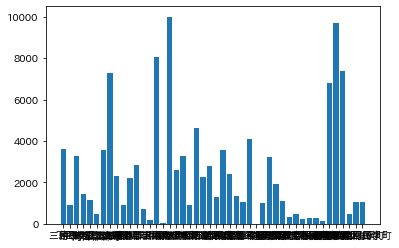

In [173]:
x = tmp.index
y = tmp.values
plt.bar(x, y)

<BarContainer object of 46 artists>

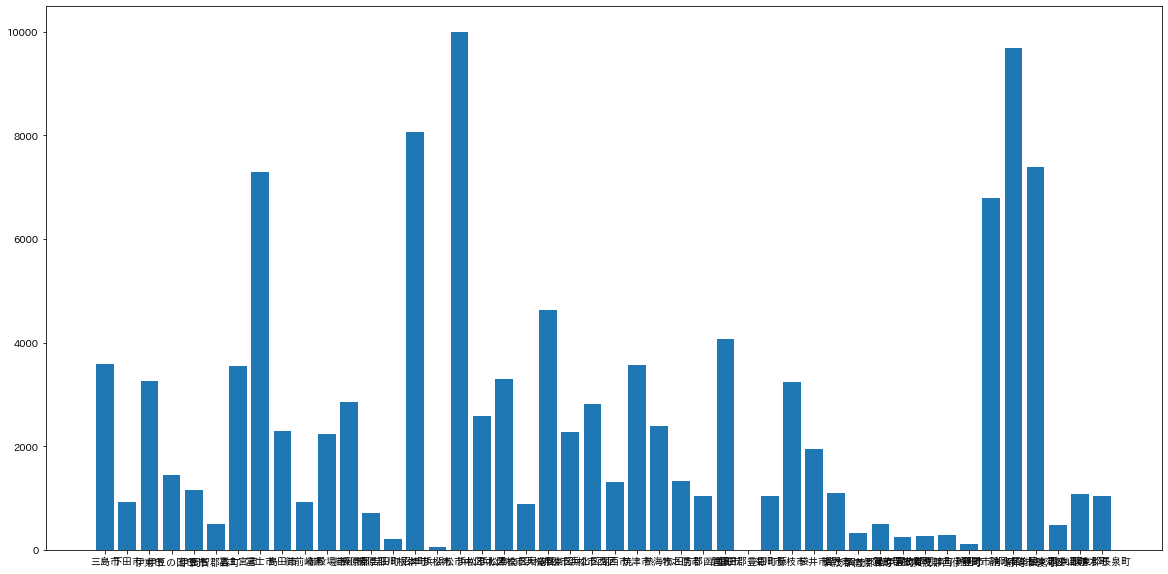

In [174]:
plt.figure(figsize=(20, 10))
plt.bar(x, y)

### 15. グラフの縦軸と表示順を変える